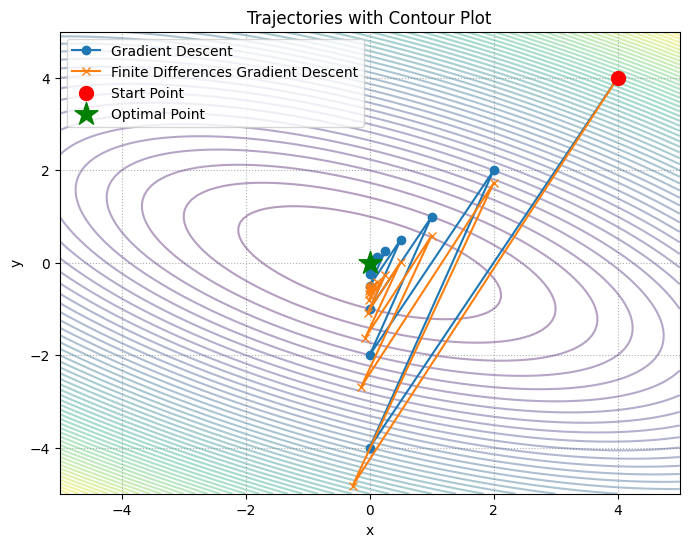

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_function(x):
    """ Quadratic function for the optimization. """
    return x[0]**2 + 3*x[1]**2 + 2*x[0]*x[1]

def gradient_descent(start_point, function, learning_rate, iterations):
    """ Gradient descent optimization. """
    trajectory = [start_point]
    point = start_point
    for _ in range(iterations):
        grad = np.array([2*point[0] + 2*point[1], 6*point[1] + 2*point[0]])
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

def zero_order_gradient_descent(start_point, function, learning_rate, iterations, epsilon):
    """ Zero order gradient descent optimization. """
    trajectory = [start_point]
    point = start_point
    for _ in range(iterations):
        grad_estimation = np.array([
            (function(point + epsilon*np.array([1, 0])) - function(point)) / epsilon,
            (function(point + epsilon*np.array([0, 1])) - function(point)) / epsilon
        ])
        point = point - learning_rate * grad_estimation
        trajectory.append(point)
    return np.array(trajectory)

# Starting point and parameters
start_point = np.array([4, 4])
learning_rate = 0.25
iterations = 50
epsilon = 1.1e0

# Run optimization methods
trajectory_gd = gradient_descent(start_point, quadratic_function, learning_rate, iterations)
trajectory_zogd = zero_order_gradient_descent(start_point, quadratic_function, learning_rate, iterations, epsilon)

def plot_contours(function, x_range, y_range, resolution=100):
    """ Plot contours of the given function. """
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Adjusted plot with contours, start point, and optimal point
plt.figure(figsize=(8, 6))

# Plot contours of the quadratic function
plot_contours(quadratic_function, x_range=(-5, 5), y_range=(-5, 5))

for c in plt.gca().collections:
    c.set_alpha(0.4)  # setting the alpha (opacity) of contour lines to 80%

# Plot trajectories
plt.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], label='Gradient Descent', marker='o')
plt.plot(trajectory_zogd[:, 0], trajectory_zogd[:, 1], label='Finite Differences Gradient Descent', marker='x')

# Mark starting and optimal points
plt.scatter(*start_point, color='red', marker='o', s=100, zorder=5, label='Start Point')
plt.scatter(0, 0, color='green', marker='*', s=300, zorder=5, label='Optimal Point')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories with Contour Plot')
plt.legend()
plt.grid(linestyle=":")
plt.savefig("zgd_fd.pdf")
plt.show()

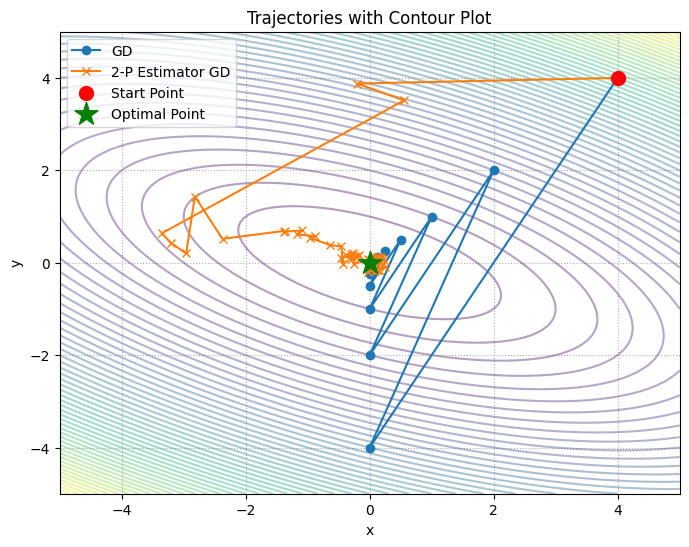

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_function(x):
    """ Quadratic function for the optimization. """
    return x[0]**2 + 3*x[1]**2 + 2*x[0]*x[1]

def gradient_descent(start_point, function, learning_rate, iterations):
    """ Gradient descent optimization. """
    trajectory = [start_point]
    point = start_point
    for _ in range(iterations):
        grad = np.array([2*point[0] + 2*point[1], 6*point[1] + 2*point[0]])
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

def zero_order_gradient_descent(start_point, function, learning_rate, iterations, epsilon):
    """ Two-point random estimator gradient descent optimization. """
    trajectory = [start_point]
    point = start_point
    # np.random.seed(0)  # For reproducibility

    for _ in range(iterations):
        random_direction = np.random.randn(2)  # Randomly sample a direction
        random_direction /= np.linalg.norm(random_direction)  # Normalize the direction

        grad_estimation = (
            function(point + epsilon * random_direction) - function(point)
        ) / epsilon * random_direction

        point = point - learning_rate * grad_estimation
        trajectory.append(point)

    return np.array(trajectory)

# Starting point and parameters
start_point = np.array([4, 4])
learning_rate = 0.25
iterations = 50
epsilon = 1.1e-1

# Run optimization methods
trajectory_gd = gradient_descent(start_point, quadratic_function, learning_rate, iterations)
trajectory_zogd = zero_order_gradient_descent(start_point, quadratic_function, learning_rate, iterations, epsilon)

def plot_contours(function, x_range, y_range, resolution=100):
    """ Plot contours of the given function. """
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = function([X, Y])
    plt.contour(X, Y, Z, levels=50, cmap='viridis')

# Adjusted plot with contours, start point, and optimal point
plt.figure(figsize=(8, 6))

# Plot contours of the quadratic function
plot_contours(quadratic_function, x_range=(-5, 5), y_range=(-5, 5))

for c in plt.gca().collections:
    c.set_alpha(0.4)  # setting the alpha (opacity) of contour lines to 80%

# Plot trajectories
plt.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], label='GD', marker='o')
plt.plot(trajectory_zogd[:, 0], trajectory_zogd[:, 1], label='2-P Estimator GD', marker='x')

# Mark starting and optimal points
plt.scatter(*start_point, color='red', marker='o', s=100, zorder=5, label='Start Point')
plt.scatter(0, 0, color='green', marker='*', s=300, zorder=5, label='Optimal Point')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories with Contour Plot')
plt.legend()
plt.grid(linestyle=":")
plt.savefig("zgd_2p.pdf")
plt.show()